In [1]:
from __future__ import division, print_function
import sys, os, glob, time, warnings, gc
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table, vstack, hstack, join
import fitsio
# from astropy.io import fits

import healpy as hp

sys.path.append(os.path.expanduser('~/git/desi-examples/imaging_systematics'))
from plot_healpix_map import plot_map

In [2]:
nside = 256
npix = hp.nside2npix(nside)

map_south = Table(fitsio.read('/global/cfs/cdirs/desi/users/rongpu/imaging_mc/ism_mask/sky_resid_map_{}_south.fits'.format(nside)))
map_south['PHOTSYS'] = 'S'
map_north = Table(fitsio.read('/global/cfs/cdirs/desi/users/rongpu/imaging_mc/ism_mask/sky_resid_map_{}_north.fits'.format(nside)))
map_north['PHOTSYS'] = 'N'

mask = (map_north['DEC']>32.375)
map_north = map_north[mask]
mask = ~np.in1d(map_south['HPXPIXEL'], map_north['HPXPIXEL'])
sky = vstack([map_north, map_south[mask]])

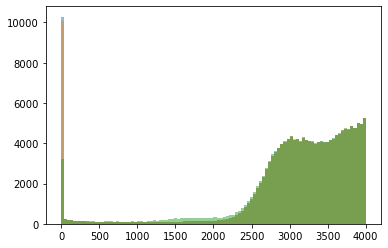

In [3]:
plt.hist(sky['nsource_g'], 100, range=(0, 4000), alpha=0.5)
plt.hist(sky['nsource_r'], 100, range=(0, 4000), alpha=0.5)
plt.hist(sky['nsource_z'], 100, range=(0, 4000), alpha=0.5)
plt.show()

In [4]:
mask = sky['nsource_g']>500
mask &= sky['nsource_r']>500
mask &= sky['nsource_z']>500
print(np.sum(mask)/len(mask))
sky = sky[mask]

0.9626028289195331


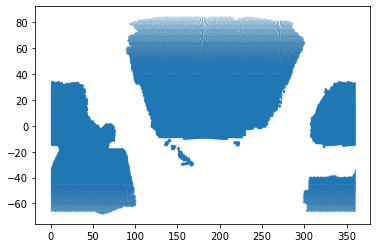

In [5]:
plt.plot(sky['RA'], sky['DEC'], '.', ms=0.1)

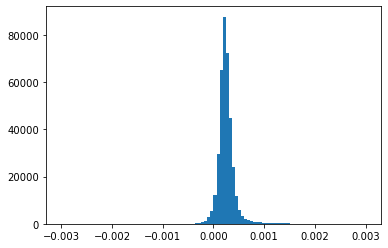

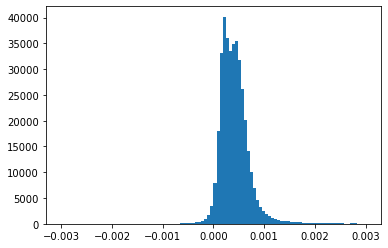

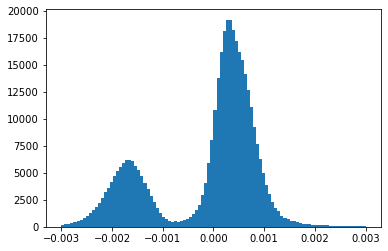

In [6]:
for band in ['g', 'r', 'z']:
    plt.hist(sky['sky_median_'+band], 100, range=(-0.003, 0.003))
    plt.show()

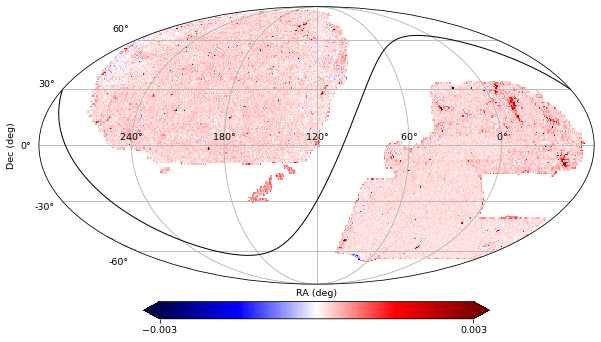

Done! 00:00:00


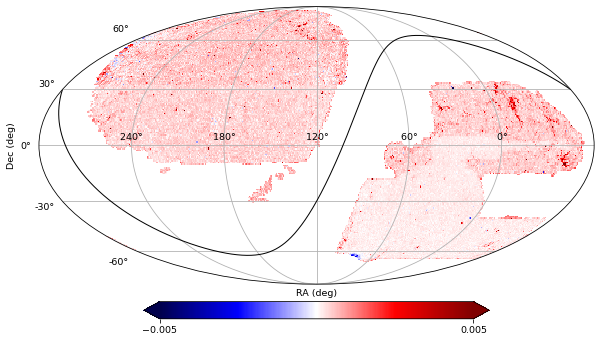

Done! 00:00:00


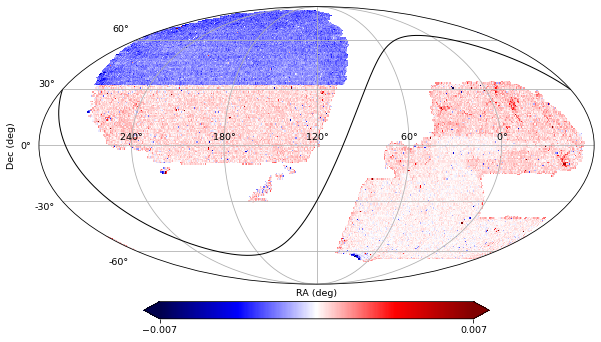

Done! 00:00:00


In [8]:
median_ranges = {'g':0.003, 'r':0.005, 'z':0.007}
for band in ['g', 'r', 'z']:
    plot_map(nside, sky['HPXPIXEL'], sky['sky_median_'+band],
             vmin=-median_ranges[band], vmax=median_ranges[band], cmap='seismic', nest=False,
             xsize=500, show=True)

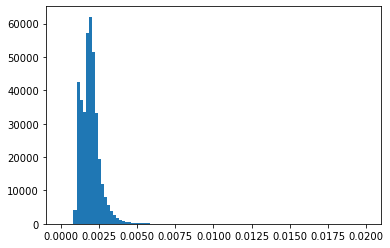

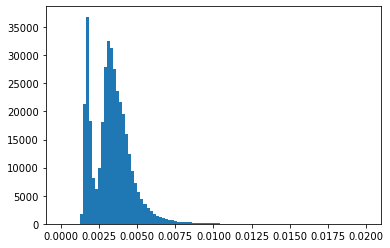

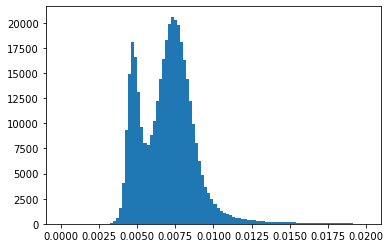

In [9]:
for band in ['g', 'r', 'z']:
    plt.hist(sky['sky_nmad_'+band], 100, range=(0., 0.02))
    plt.show()

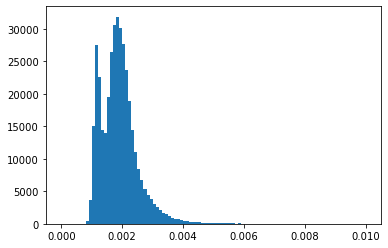

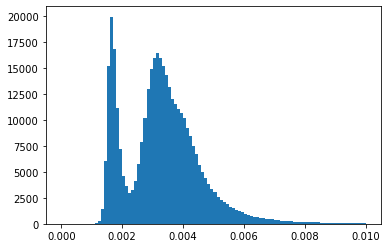

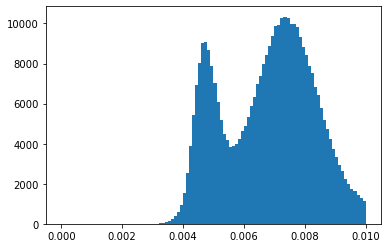

In [10]:
for band in ['g', 'r', 'z']:
    plt.hist(sky['sky_nmad_'+band], 100, range=(0., 0.01))
    plt.show()

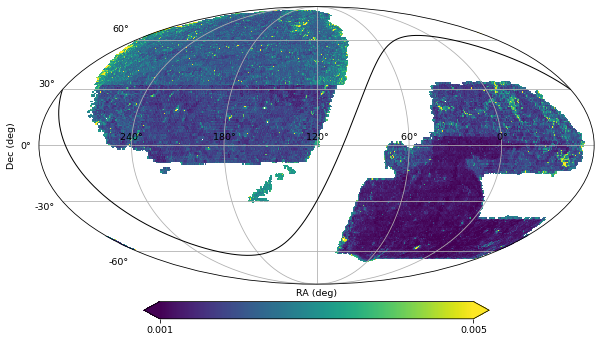

Done! 00:00:00


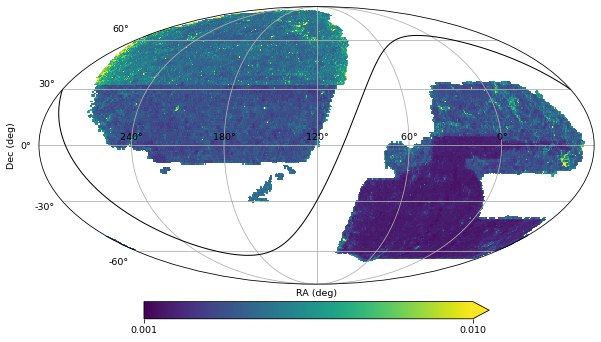

Done! 00:00:00


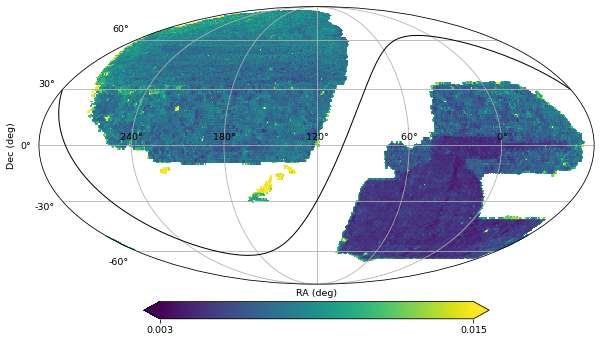

Done! 00:00:00


In [11]:
nmad_ranges = {'g':[0.001, 0.005], 'r':[0.001, 0.01], 'z':[0.003, 0.015]}
for band in ['g', 'r', 'z']:
    plot_map(nside, sky['HPXPIXEL'], sky['sky_nmad_'+band],
             vmin=nmad_ranges[band][0], vmax=nmad_ranges[band][1], cmap='viridis', nest=False,
             xsize=500, show=True)